In [28]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

import env
import wrangle

from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score


from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt

In [2]:
df = wrangle.wrangle_zillow()

In [42]:
df.head(0)

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips


##### Split dataset into 3 samples

In [3]:
zillow_train, zillow_test = train_test_split(df, test_size=.2, random_state=123)
zillow_train, zillow_validate = train_test_split(zillow_train, test_size=.3, random_state=123)

In [44]:
x = df['calculatedfinishedsquarefeet']
y = df['taxvaluedollarcnt']

##### Plot train x and y variable on scatter plot

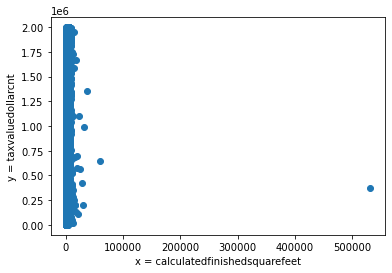

In [6]:
# look at scatter of x vs y
plt.scatter(zillow_train.calculatedfinishedsquarefeet, zillow_train.taxvaluedollarcnt)
plt.xlabel('x = calculatedfinishedsquarefeet')
plt.ylabel('y = taxvaluedollarcnt');

##### Create baseline

In [7]:
baseline = zillow_train.taxvaluedollarcnt.mean()
baseline

398734.9540404411

In [8]:
#baseline is mean of dependent variable
zillow_train['baseline'] = zillow_train.taxvaluedollarcnt.mean()
zillow_train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,baseline
421888,3,2.0,1550.0,357034.0,1961,4418.72,6037,398734.95404
548087,3,3.5,1800.0,287774.0,1996,2798.18,6059,398734.95404
714717,3,2.0,1542.0,588738.0,1923,7210.51,6037,398734.95404
749704,3,1.0,1128.0,290984.0,1952,3622.02,6037,398734.95404
539577,0,1.0,396.0,34541.0,1942,579.61,6037,398734.95404


##### Plot train data with baseline

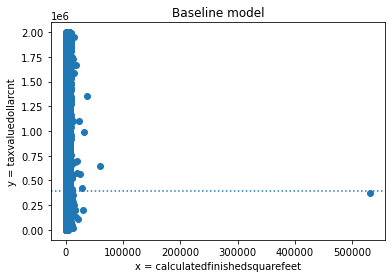

In [9]:
# plot data with baseline:

plt.scatter(zillow_train.calculatedfinishedsquarefeet, zillow_train.taxvaluedollarcnt)
plt.axhline(zillow_train.taxvaluedollarcnt.mean(), ls = ':')
plt.xlabel('x = calculatedfinishedsquarefeet')
plt.ylabel('y = taxvaluedollarcnt')
plt.title('Baseline model');

##### Create Linear Regression model, fit model to train, and make predictions(yhat) of taxvaluedollarcnt

In [10]:
# Now we fit a regression model using OLS method.
# OLS = ordinary least squares.

# create the model object
lm = LinearRegression(normalize=True)

# fit the model to training data
lm.fit(zillow_train[['calculatedfinishedsquarefeet']], zillow_train.taxvaluedollarcnt)

# make prediction
zillow_train['yhat'] = lm.predict(zillow_train[['calculatedfinishedsquarefeet']])

zillow_train

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,baseline,yhat
421888,3,2.0,1550.0,357034.0,1961,4418.72,6037,398734.95404,357264.612498
548087,3,3.5,1800.0,287774.0,1996,2798.18,6059,398734.95404,399104.649483
714717,3,2.0,1542.0,588738.0,1923,7210.51,6037,398734.95404,355925.731315
749704,3,1.0,1128.0,290984.0,1952,3622.02,6037,398734.95404,286638.630067
539577,0,1.0,396.0,34541.0,1942,579.61,6037,398734.95404,164131.001774
...,...,...,...,...,...,...,...,...,...
83961,3,2.5,2460.0,463327.0,1966,5183.18,6059,398734.95404,509562.347124
828457,2,1.5,1191.0,517777.0,1987,5353.78,6059,398734.95404,297182.319387
722901,3,2.0,1755.0,478054.0,1944,5785.01,6037,398734.95404,391573.442826
821001,3,1.0,1188.0,72975.0,1947,482.63,6037,398734.95404,296680.238943


##### Plot linear regression model with train x and y variable

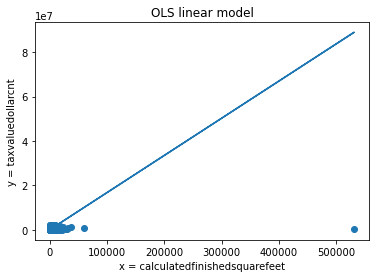

In [11]:
# visualize the line of best fit from OLS linear model
plt.scatter(zillow_train.calculatedfinishedsquarefeet, zillow_train.taxvaluedollarcnt)
plt.plot(zillow_train.calculatedfinishedsquarefeet, zillow_train.yhat)
plt.xlabel('x = calculatedfinishedsquarefeet')
plt.ylabel('y = taxvaluedollarcnt')
plt.title('OLS linear model');

### Plot Residuals

In [12]:
z_residuals = zillow_train[['calculatedfinishedsquarefeet','taxvaluedollarcnt', 'baseline', 'yhat' ]]

In [13]:
# residual = actual - predicted
z_residuals['residual'] = z_residuals.taxvaluedollarcnt - z_residuals.yhat
z_residuals['baseline_residual'] = z_residuals.taxvaluedollarcnt - z_residuals.baseline

In [14]:
z_residuals

,calculatedfinishedsquarefeet,taxvaluedollarcnt,baseline,yhat,residual,baseline_residual
421888,1550.0,357034.0,398734.95404,357264.612498,-230.612498,-41700.95404
548087,1800.0,287774.0,398734.95404,399104.649483,-111330.649483,-110960.95404
714717,1542.0,588738.0,398734.95404,355925.731315,232812.268685,190003.04596
749704,1128.0,290984.0,398734.95404,286638.630067,4345.369933,-107750.95404
539577,396.0,34541.0,398734.95404,164131.001774,-129590.001774,-364193.95404
...,...,...,...,...,...,...
83961,2460.0,463327.0,398734.95404,509562.347124,-46235.347124,64592.04596
828457,1191.0,517777.0,398734.95404,297182.319387,220594.680613,119042.04596
722901,1755.0,478054.0,398734.95404,391573.442826,86480.557174,79319.04596
821001,1188.0,72975.0,398734.95404,296680.238943,-223705.238943,-325759.95404


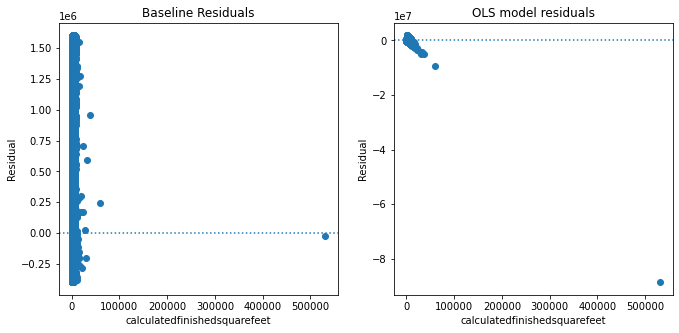

In [16]:
# residual plots (x vs residual)

plt.figure(figsize = (11,5))

plt.subplot(121)
plt.scatter(z_residuals.calculatedfinishedsquarefeet, z_residuals.baseline_residual)
plt.axhline(y = 0, ls = ':')
plt.xlabel('calculatedfinishedsquarefeet')
plt.ylabel('Residual')
plt.title('Baseline Residuals')

plt.subplot(122)
plt.scatter(z_residuals.calculatedfinishedsquarefeet, z_residuals.residual)
plt.axhline(y = 0, ls = ':')
plt.xlabel('calculatedfinishedsquarefeet')
plt.ylabel('Residual')
plt.title('OLS model residuals');

In [46]:
yhat = z_residuals['yhat']


In [48]:
def plot_residuals(y,yhat):
    
    zillow_train['yhat'] = lm.predict(zillow_train[['calculatedfinishedsquarefeet']])

    z_residuals = zillow_train[['calculatedfinishedsquarefeet','taxvaluedollarcnt', 'baseline', 'yhat' ]]

    # residual = actual - predicted
    z_residuals['residual'] = z_residuals.taxvaluedollarcnt - z_residuals.yhat
    z_residuals['baseline_residual'] = z_residuals.taxvaluedollarcnt - z_residuals.baseline

    # residual plots (x vs residual)

    plt.figure(figsize = (11,5))

    plt.subplot(121)
    plt.scatter(z_residuals.calculatedfinishedsquarefeet, z_residuals.baseline_residual)
    plt.axhline(y = 0, ls = ':')
    plt.xlabel('calculatedfinishedsquarefeet')
    plt.ylabel('Residual')
    plt.title('Baseline Residuals')

    plt.subplot(122)
    plt.scatter(z_residuals.calculatedfinishedsquarefeet, z_residuals.residual)
    plt.axhline(y = 0, ls = ':')
    plt.xlabel('calculatedfinishedsquarefeet')
    plt.ylabel('Residual')
    plt.title('OLS model residuals');

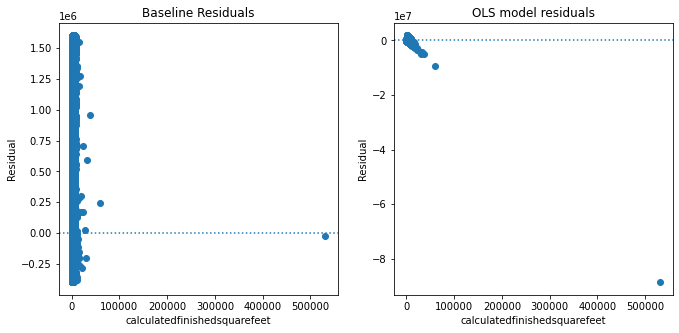

In [49]:
plot_residuals(y,yhat)

#### Calculate the Sums and errors

##### Residuals Squared

In [18]:
# Residuals squared

z_residuals['residual^2'] = z_residuals.residual**2
z_residuals['baseline_residual^2'] = z_residuals.baseline_residual**2

z_residuals

,calculatedfinishedsquarefeet,taxvaluedollarcnt,baseline,yhat,residual,baseline_residual,residual^2,baseline_residual^2
421888,1550.0,357034.0,398734.95404,357264.612498,-230.612498,-41700.95404,5.318212e+04,1.738970e+09
548087,1800.0,287774.0,398734.95404,399104.649483,-111330.649483,-110960.95404,1.239451e+10,1.231233e+10
714717,1542.0,588738.0,398734.95404,355925.731315,232812.268685,190003.04596,5.420155e+10,3.610116e+10
749704,1128.0,290984.0,398734.95404,286638.630067,4345.369933,-107750.95404,1.888224e+07,1.161027e+10
539577,396.0,34541.0,398734.95404,164131.001774,-129590.001774,-364193.95404,1.679357e+10,1.326372e+11
...,...,...,...,...,...,...,...,...
83961,2460.0,463327.0,398734.95404,509562.347124,-46235.347124,64592.04596,2.137707e+09,4.172132e+09
828457,1191.0,517777.0,398734.95404,297182.319387,220594.680613,119042.04596,4.866201e+10,1.417101e+10
722901,1755.0,478054.0,398734.95404,391573.442826,86480.557174,79319.04596,7.478887e+09,6.291511e+09
821001,1188.0,72975.0,398734.95404,296680.238943,-223705.238943,-325759.95404,5.004403e+10,1.061195e+11


##### Mean Squared Error

In [20]:
# shape of z_residuals
len(z_residuals)
z_residuals.shape[0]

1172966

In [21]:
MSE = SSE/len(z_residuals)
MSE_baseline = SSE_baseline/len(z_residuals)

print("MSE = ", "{:.1f}".format(MSE))
print("MSE baseline = ", "{:.1f}".format(MSE_baseline))

MSE =  74150885118.4
MSE baseline =  98437835105.4


##### RMSE (Root Mean Squared Error)

In [22]:
from math import sqrt
RMSE = sqrt(MSE)
RMSE_baseline =  sqrt(MSE_baseline)


print("RMSE = ", "{:.1f}".format(RMSE))
print("RMSE baseline = ", "{:.1f}".format(RMSE_baseline))

RMSE =  272306.6
RMSE baseline =  313748.0


##### Explained Sum of Squares
ESS = sum((df.yhat - df.y.mean())**2)


In [23]:
# compute explained sum of squares
ESS = sum((z_residuals.yhat - z_residuals.taxvaluedollarcnt.mean())**2)

ESS


2.84877665784071e+16

##### Total Sum of Squares (TSS)

In [24]:
TSS = ESS + SSE

TSS

1.1546423369221109e+17

##### Code that compares the sum of squared errors of model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [25]:
SSE = z_residuals['residual^2'].sum()
SSE_baseline = z_residuals['baseline_residual^2'].sum()

print('SSE =', "{:.1f}".format(SSE))
print("SSE Baseline =", "{:.1f}".format(SSE_baseline))

SSE = 86976467113803984.0
SSE Baseline = 115464233692208544.0


In [30]:
# Is the model SSE less than the baseline SSE. If so the model performs better.
SSE  < SSE_baseline

True

In [ ]:

TSS = ESS + SSE
print("ESS = ", ESS)
print("SSE = ", SSE[0])
print("TSS = ", TSS[0])


##### What is the amount of variance explained in your model?

In [29]:
# sklearn.metrics.explained_variance_score

evs = explained_variance_score(z_residuals.taxvaluedollarcnt, z_residuals.yhat)
print('Explained Variance = ', round(evs,3))


Explained Variance =  0.247


##### Create evaluate.py 

- plot_residuals(y, yhat): creates a residual plot

- regression_errors(y, yhat): returns the following values:
-           sum of squared errors (SSE)
-           explained sum of squares (ESS)
-           total sum of squares (TSS)
-           mean squared error (MSE)
-           root mean squared error (RMSE)

- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model

- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [50]:
zillow_train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,baseline,yhat
421888,3,2.0,1550.0,357034.0,1961,4418.72,6037,398734.95404,357264.612498
548087,3,3.5,1800.0,287774.0,1996,2798.18,6059,398734.95404,399104.649483
714717,3,2.0,1542.0,588738.0,1923,7210.51,6037,398734.95404,355925.731315
749704,3,1.0,1128.0,290984.0,1952,3622.02,6037,398734.95404,286638.630067
539577,0,1.0,396.0,34541.0,1942,579.61,6037,398734.95404,164131.001774
